# CuPy의 소개

CuPy는 NumPy 문법을 이용하여 Nvidia GPU를 쉽게 사용할 수 있게 해주는 라이브러리다.

*   공식 홈페이지: [https://cupy.dev/](https://cupy.dev/)
*   Documents: [https://docs.cupy.dev/en/stable/](https://docs.cupy.dev/en/stable/)
*   Comparison Table: [https://docs.cupy.dev/en/stable/reference/comparison.html](https://docs.cupy.dev/en/stable/reference/comparison.html)



# Google Colaboratory에서 CuPy를 사용하기 위한 설정

1.   메뉴 > 런타임 > 런타임 유형 변경 > 하드웨어 가속기를 GPU로 변경 > 확인
2.   `!nvidia-smi`로 CUDA 버전 확인

In [ ]:
!nvidia-smi

Sat Dec 12 04:55:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------



4.   CUDA 버전에 맞는 CuPy를 pip로 설치
  *   https://docs.cupy.dev/en/stable/install.html#installing-cupy







In [ ]:
!pip install cupy-cuda101

# CuPy의 기초

In [ ]:
import numpy as np
import cupy as cp

In [ ]:
def print_data(title, val):
  print(title)
  print(f'  type: {type(val)}')
  print(f'  value: {val}\n')

*   NumPy와 같은 문법으로 `cupy.core.core.ndarray`를 생성하고, 계산한다.

In [ ]:
print('##############################################################')
print('# ndarray 생성 ###############################################')
print('')

np_arr = np.array([1, 2, 3])
print_data('np_arr', np_arr)

cp_arr = cp.array([1, 2, 3])
print_data('cp_arr', cp_arr)

print('##############################################################')
print('# Indexing ###################################################')
print('')

np_idx = np_arr[1]
cp_idx = cp_arr[1]
print_data('np_idx', np_idx)
print_data('cp_idx', cp_idx)

print('##############################################################')
print('# sum() ######################################################')
print('')

np_sum = np_arr.sum()
cp_sum = cp_arr.sum()
print_data('np_sum', np_sum)
print_data('cp_sum', cp_sum)

print('##############################################################')
print('# +1 #########################################################')
print('')

np_plus_one = np_arr + 1
cp_plus_one = cp_arr + 1
print_data('np_plus_one', np_plus_one)
print_data('cp_plus_one', cp_plus_one)

##############################################################
# ndarray 생성 ###############################################

np_arr
  type: <class 'numpy.ndarray'>
  value: [1 2 3]

cp_arr
  type: <class 'cupy.core.core.ndarray'>
  value: [1 2 3]

##############################################################
# Indexing ###################################################

np_idx
  type: <class 'numpy.int64'>
  value: 2

cp_idx
  type: <class 'cupy.core.core.ndarray'>
  value: 2

##############################################################
# sum() ######################################################

np_sum
  type: <class 'numpy.int64'>
  value: 6

cp_sum
  type: <class 'cupy.core.core.ndarray'>
  value: 6

##############################################################
# +1 #########################################################

np_plus_one
  type: <class 'numpy.ndarray'>
  value: [2 3 4]

cp_plus_one
  type: <class 'cupy.core.core.ndarray'>
  value: [2 3 4]



*   Host와 Device간에 Array를 이동할 수 있다.

In [ ]:
print('##############################################################')
print('# 원본 (numpy.ndarray) #######################################')
print('')

print_data('np_arr', np_arr)

print('##############################################################')
print('# Host to Device 변환 ########################################')
print('')

trs_arr = cp.asarray(np_arr)
print_data('np.array > cp.array', trs_arr)

print('##############################################################')
print('# Device to Host 변환 ########################################')
print('')

trs_arr = cp.asnumpy(trs_arr)
print_data('cp.array > np.array', trs_arr)

print('##############################################################')
print('# Device와 Host간의 연산 #####################################')
print('')

new_arr = cp_arr + cp.asarray(np_arr)
print_data('cp_arr + cp.asarray(np_arr)', new_arr)

##############################################################
# 원본 (numpy.ndarray) #######################################

np_arr
  type: <class 'numpy.ndarray'>
  value: [1 2 3]

##############################################################
# Host to Device 변환 ########################################

np.array > cp.array
  type: <class 'cupy.core.core.ndarray'>
  value: [1 2 3]

##############################################################
# Device to Host 변환 ########################################

cp.array > np.array
  type: <class 'numpy.ndarray'>
  value: [1 2 3]

##############################################################
# Device와 Host간의 연산 #####################################

cp_arr + cp.asarray(np_arr)
  type: <class 'cupy.core.core.ndarray'>
  value: [2 4 6]





*   NumPy와 CuPy간 `random.standard_normal()`, `sum()` 함수의 성능 비교



In [ ]:
import time

DATA_CNT = 50000000

np.random.seed(int(time.time()))
cp.random.seed(int(time.time()))

# random.standard_normal()
print('##############################################################')
print('# random.standard_normal() ###################################')
print('')

st_time = time.time()
np_arr = np.random.standard_normal(DATA_CNT)
ed_time = time.time()
print(f'  numpy의 소요시간: {ed_time - st_time}초')

st_time = time.time()
cp_arr = cp.random.standard_normal(DATA_CNT)
ed_time = time.time()
print(f'  cupy의 소요시간: {ed_time - st_time}초')
print('')

# sum()
print('##############################################################')
print('# sum() ######################################################')
print('')

st_time = time.time()
np_sum = np_arr.sum()
ed_time = time.time()
print(f'  numpy의 소요시간: {ed_time - st_time}초')

st_time = time.time()
cp_sum = cp_arr.sum()
ed_time = time.time()
print(f'  cupy의 소요시간: {ed_time - st_time}초')

##############################################################
# random.standard_normal() ###################################

  numpy의 소요시간: 2.3894052505493164초
  cupy의 소요시간: 0.43485498428344727초

##############################################################
# sum() ######################################################

  numpy의 소요시간: 0.03446078300476074초
  cupy의 소요시간: 0.2177906036376953초


*   Device가 여러개인 경우 사용하고 싶은 Device를 선택할 수 있다.
*   Device가 한개뿐이라면 할 필요가 없다.



In [ ]:
cp.cuda.Device(0).use()
x_on_gpu0 = cp.array([1, 2, 3, 4, 5])

#cp.cuda.Device(1).use()
#x_on_gpu1 = cp.array([1, 2, 3, 4, 5])

#with cp.cuda.Device(1):
#  x_on_gpu1 = cp.array([1, 2, 3, 4, 5])
x_on_gpu0 = cp.array([1, 2, 3, 4, 5])

# 유의사항

## 적은 양의 데이터

*   다루는 데이터의 양이 적다면 NumPy가 CuPy보다 오히려 빠르다.

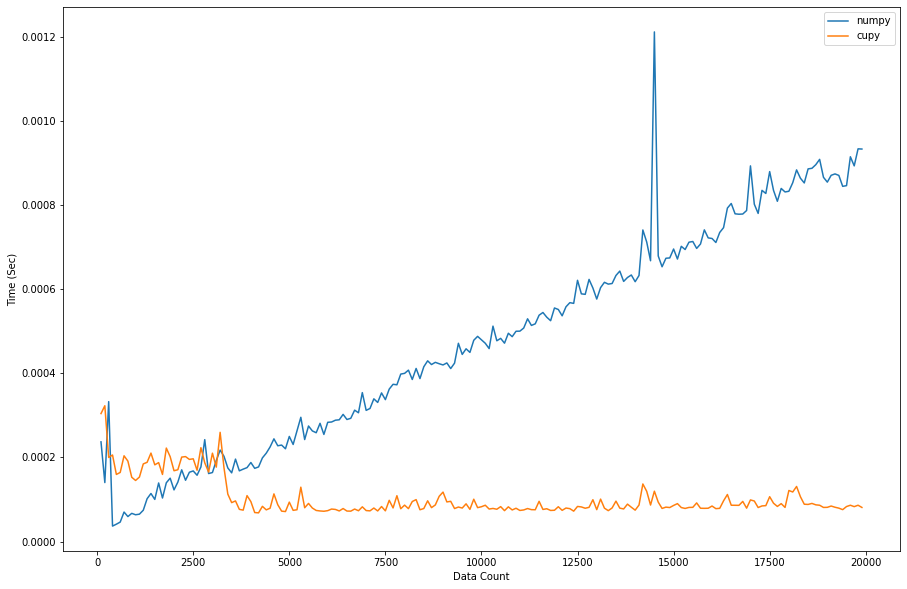

In [ ]:
from matplotlib import pyplot as plt

data_cnts = list(range(100, 20000, 100))

np_t = []
cp_t = []

for data_cnt in data_cnts:
  st_time = time.time()
  np_arr = np.random.standard_normal(data_cnt)
  ed_time = time.time()
  np_t.append(ed_time - st_time)

  st_time = time.time()
  cp_arr = cp.random.standard_normal(data_cnt)
  ed_time = time.time()
  cp_t.append(ed_time - st_time)

plt.figure(figsize=(15, 10))
plt.plot(data_cnts, np_t)
plt.plot(data_cnts, cp_t)
plt.xlabel('Data Count')
plt.ylabel('Time (Sec)')
plt.legend(['numpy', 'cupy'])
plt.show()

## 반복문의 사용

*   CuPy의 ndarray를 Python의 반복문을 이용하여 처리하지 않는다.

In [ ]:
DATA_CNT = 100000

cp.random.seed(int(time.time()))

cp_arr = cp.random.standard_normal(DATA_CNT)
np_arr = cp.asnumpy(cp_arr)

np_sum = 0
cp_sum = 0

st_time = time.time()

for x in np_arr:
  np_sum = np_sum + x

ed_time = time.time()

print(f'numpy의 array를 for문으로 모두 더한 경우의 소요시간: {ed_time - st_time}초')

st_time = time.time()

for x in cp_arr:
  cp_sum = cp_sum + x

ed_time = time.time()

print(f'cupy의 array를 for문으로 모두 더한 경우의 소용시간: {ed_time - st_time}초')

numpy의 array를 for문으로 모두 더한 경우의 소요시간: 0.03334951400756836초
cupy의 array를 for문으로 모두 더한 경우의 소용시간: 1.655433177947998초


# 사용자 정의 커널

In [ ]:
# 앞으로 사용할 데이터
cp_arr1 = cp.arange(1, 11, dtype=cp.float32)
cp_arr2 = cp.arange(11, 21, dtype=cp.float32)

print_data('cp_arr1', cp_arr1)
print_data('cp_arr2', cp_arr2)

cp_arr1
  type: <class 'cupy.core.core.ndarray'>
  value: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

cp_arr2
  type: <class 'cupy.core.core.ndarray'>
  value: [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]



## Elementwise Kernels

*   `ElementwiseKernel`의 인스턴스는 `__call__` 메소드에 의해 호출될 수 있는 CUDA Kernel을 정의한다.
*   `n`과 `i` 그리고 `_`로 시작하는 이름은 내부적으로 이미 예약되어있다.

In [ ]:
my_sum_func = cp.ElementwiseKernel(
  'float32 x, float32 y',  # in_params (str) – Input argument list
  'float32 z',  # out_params (str) – Output argument list
  'z = x + y',  # operation (str) – The body in the loop written in CUDA-C/C++
  'my_sum_func' # name (str) – Name of the kernel function. It should be set for readability of the performance profiling
)

ret1 = my_sum_func(cp_arr1, cp_arr2)
print_data('result1', ret1)

ret2 = cp.empty(10, dtype=cp.float32)
my_sum_func(cp_arr1, cp_arr2, ret2)
print_data('result2', ret2)

result1
  type: <class 'cupy.core.core.ndarray'>
  value: [12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]

result2
  type: <class 'cupy.core.core.ndarray'>
  value: [12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]



*   Type 지정자가 한 글자인 경우 Type placeholder로 취급되며, 실제 사용하는 Type에 따라 결정된다.



In [ ]:
my_sum_func = cp.ElementwiseKernel(
  'T x, T y',
  'T z',
  'z = x + y',
  'my_sum_func'
)

ret = my_sum_func(cp_arr1, cp_arr2)
print_data('result', ret)

result
  type: <class 'cupy.core.core.ndarray'>
  value: [12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]



*   두 개 이상의 Type placeholder를 사용할 수 있다.



In [ ]:
my_sum_func = cp.ElementwiseKernel(
  'T x, T y',
  'K z',
  'z = x + y',
  'my_sum_func'
)
 
ret = cp.empty(10, dtype=cp.int32)
my_sum_func(cp_arr1, cp_arr2, ret)
print_data('result', ret)

result
  type: <class 'cupy.core.core.ndarray'>
  value: [12 14 16 18 20 22 24 26 28 30]



*   `ElementwiseKernel`은 indexing을 자동으로 하지만 Raw 인지 지정자를 통해 수도으로 indexing을 할 수 있다.
*   `_ind.size()`는 전체 요소의 갯수, `i`는 현재 요소의 위치를 의미한다.

In [ ]:
add_reverse = cp.ElementwiseKernel(
    'T x, raw T y',
    'T z',
    r'''
    if ( i < _ind.size()/2 ) {
      z = x + y[_ind.size() - i - 1];
    }
    else {
      z = 0;
    }
    ''',
    'add_reverse'
)

ret = add_reverse(cp_arr1, cp_arr2);
print_data('result', ret)

result
  type: <class 'cupy.core.core.ndarray'>
  value: [21. 21. 21. 21. 21.  0.  0.  0.  0.  0.]



## Reduction Kernels

In [ ]:
l2norm_kernel = cp.ReductionKernel(
    'T x',  # in_params (str) – Input argument list
    'T y',  # out_params (str) – Output argument list
    'x * x',  # map_expr (str) – Mapping expression for input values
    'a + b',  # reduce_expr (str) – Reduction expression
    'y = sqrt(a)',  # post_map_expr (str) – Mapping expression for reduced values
    '0',  # identity (str) – Identity value for starting the reduction
    'l2norm'  # name (str) – Name of the kernel function. It should be set for readability of the performance profiling
)

x = cp.arange(10, dtype=np.float32)
ret = l2norm_kernel(x)
print_data('result', ret)

result
  type: <class 'cupy.core.core.ndarray'>
  value: 16.881943



## Raw Kernels

*   `RawKernel`을 통해 Grid, Block, Shared Memory의 크기를 직접 조절할 수 있다.
*   Return이 없으므로 값을 받을 배열을 넘겨줘야한다.

In [ ]:
my_add_kernel = cp.RawKernel(r'''
extern "C" __global__
void my_add(const float* arr1, const float* arr2, float* ret_arr) {
    int tid = blockDim.x * blockIdx.x + threadIdx.x;
    ret_arr[tid] = arr1[tid] + arr2[tid];
}
''', 'my_add')

ret = cp.zeros(10, dtype=cp.float32)
my_add_kernel((2,), (5,), (cp_arr1, cp_arr2, ret))  # grid, block and arguments
print_data('result', ret)

result
  type: <class 'cupy.core.core.ndarray'>
  value: [12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]



In [ ]:
sum_all_kernel = cp.RawKernel(r'''
extern "C" __global__
void sum_all(const float* in_arr, float* out_ret)
{
  unsigned int tid = blockDim.x * blockIdx.x + threadIdx.x;
  out_ret[tid] = in_arr[tid];
  __syncthreads();

  for ( int s=1 ; s<blockDim.x ; s*=2 )
  {
    if ( 0 == tid % (2*s) && tid+s < blockDim.x )
    {
      out_ret[tid] += out_ret[tid+s];
    }
    __syncthreads();
  }
}
''', 'sum_all')

ret = cp.zeros(10, dtype=cp.float32)
sum_all_kernel((2,), (5,), (cp_arr1, ret))
print_data('result', ret)

result
  type: <class 'cupy.core.core.ndarray'>
  value: [15.  2.  7.  4.  5.  6.  7.  8.  9. 10.]



## Raw modules


*   `RawModule`을 이용하여 큰 CUDA 소스나 이미 있는 CUDA Binary를 사용 할 수 있다.


In [ ]:
loaded_from_source = r'''
extern "C"{
__global__ void test_sum(const float* x1, const float* x2, float* y)
{
    unsigned int tid = blockDim.x * blockIdx.x + threadIdx.x;
    y[tid] = x1[tid] + x2[tid];
}
__global__ void test_multiply(const float* x1, const float* x2, float* y)
{
    unsigned int tid = blockDim.x * blockIdx.x + threadIdx.x;
    y[tid] = x1[tid] * x2[tid];
}
}'''

module = cp.RawModule(code=loaded_from_source)
ker_sum = module.get_function('test_sum')
ker_times = module.get_function('test_multiply')

ret = cp.zeros(10, dtype=cp.float32)

ker_sum((2,), (5,), (cp_arr1, cp_arr2, ret))
print_data('cp_arr1 + cp_arr2', ret)

ker_times((2,), (5,), (cp_arr1, cp_arr2, ret))
print_data('cp_arr1 * cp_arr2', ret)

cp_arr1 + cp_arr2
  type: <class 'cupy.core.core.ndarray'>
  value: [12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]

cp_arr1 * cp_arr2
  type: <class 'cupy.core.core.ndarray'>
  value: [ 11.  24.  39.  56.  75.  96. 119. 144. 171. 200.]



## Kernel fusion


*   `@cp.fuse()` 데코레이터를 이용하여 좀 더 쉽게 `ElementwiseKernel`과 `ReductionKernel`을 사용할 수 있다.
*   `@cp.fuse()` 데코레이터은 현재 간단한 Reduction operations만 지원한다.


In [ ]:
@cp.fuse()
def squared_diff(x, y):
    return (x - y) * (x - y)

ret = squared_diff(cp_arr1, cp_arr2)
print_data('squared_diff', ret)

squared_diff
  type: <class 'cupy.core.core.ndarray'>
  value: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]



In [ ]:
@cp.fuse()
def sum_of_products(x, y):
    return cp.sum(x * y, axis = -1)

ret = sum_of_products(cp_arr1, cp_arr2)
print_data('sum_of_products', ret)

sum_of_products
  type: <class 'cupy.core.core.ndarray'>
  value: 935.0

